## 모델 불러오기

In [1]:
## 라이브러리 설치
##pip install trimesh

In [2]:
import trimesh

In [3]:
model = trimesh.load('./obj/model.stl')

In [4]:
model.show()

In [5]:
## 모델 내 중복된 꼭지점 합치기
## trimesh에서는 필요없음
# model.merge_vertices()

In [6]:
## 변수에 저장
vertices = model.vertices

## 샘플 추출

https://trimesh.org/trimesh.sample.html

## 시각화

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

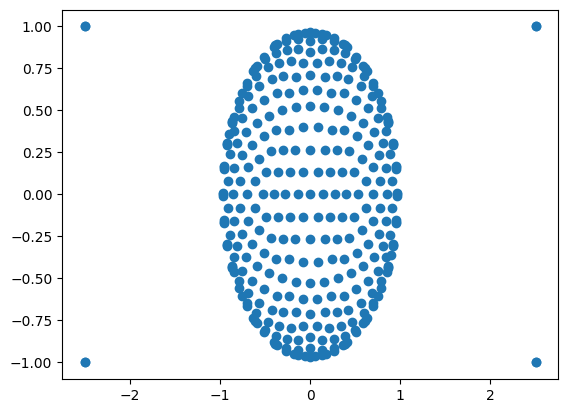

In [8]:
plt.scatter(vertices[:,0], vertices[:,1])

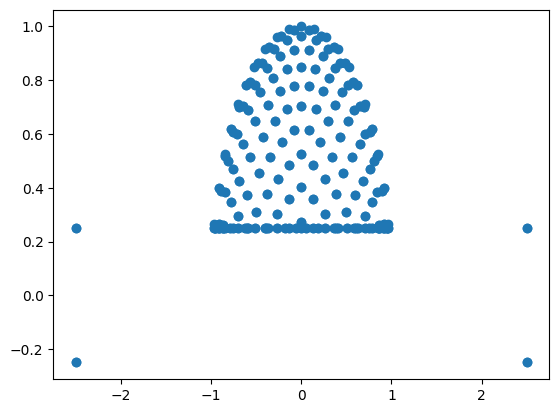

In [9]:
plt.scatter(vertices[:,0], vertices[:,2])

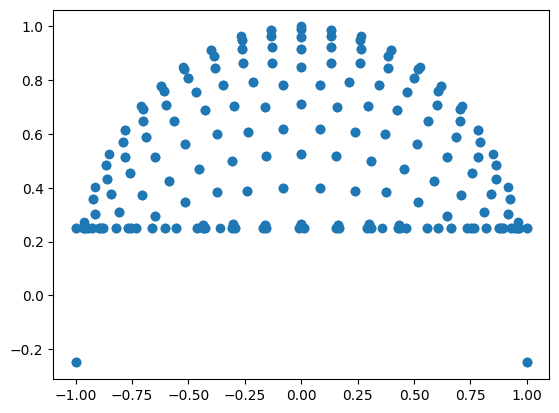

In [10]:
plt.scatter(vertices[:,1], vertices[:,2])

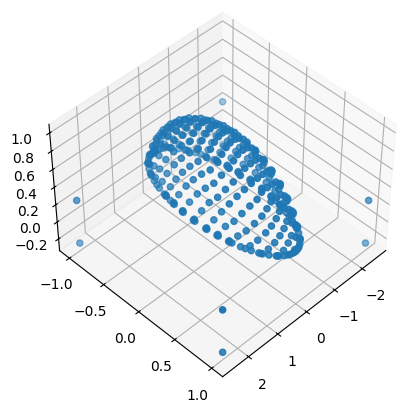

In [11]:
## 꼭지점 scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=45)
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])

In [28]:
##sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 100)
points = samples[0]
points

TrackedArray([[ 2.5       , -0.218518  , -0.18961637],
              [ 1.75568309,  0.17017199,  0.25      ],
              [ 0.60707496, -0.4774931 , -0.25      ],
              [-1.17111063, -0.43190492,  0.25      ],
              [-2.30570585,  0.08082101,  0.25      ],
              [ 2.41563975, -1.        ,  0.14403156],
              [ 2.32307595,  0.79219883,  0.25      ],
              [ 2.42684021,  1.        , -0.11281454],
              [-0.25889553,  0.8613617 ,  0.43650354],
              [ 0.92809825, -0.58711743,  0.25      ],
              [-1.81568543,  0.93718236,  0.25      ],
              [-1.80294147,  0.07995819,  0.25      ],
              [-0.93504183,  0.77685098,  0.25      ],
              [ 0.30538052, -0.81229028,  0.49110713],
              [-0.97550812, -0.16129513,  0.25      ],
              [ 1.83804064, -0.86016048, -0.25      ],
              [ 0.65093535,  0.66637835,  0.35460734],
              [ 1.28961999,  0.00741187,  0.25      ],
          

In [48]:
## 거리상관 없이 임의의 점을 샘플링 할 때,

# import random
# import pandas as pd
# 
# sample_rand = trimesh.sample.sample_surface_even(model, 1000)
# points_rand = list(sample_rand[0])
# points_res = random.sample(points_rand, 100)
# 
# df_test = pd.DataFrame(points_res)
# df_test.to_csv('../3D/data/test.csv', index=False)

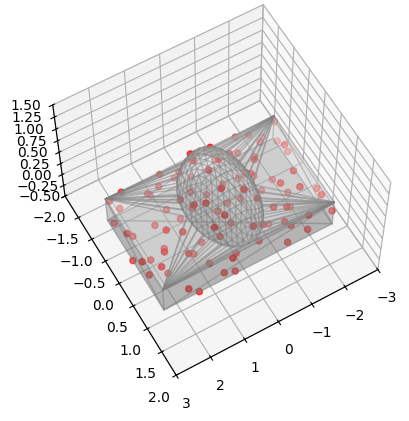

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 점들 표시
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red')
## mesh 표현
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

## 보이는 각도 조정
ax.view_init(elev=60, azim=60)

## 축 크기 조정
plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

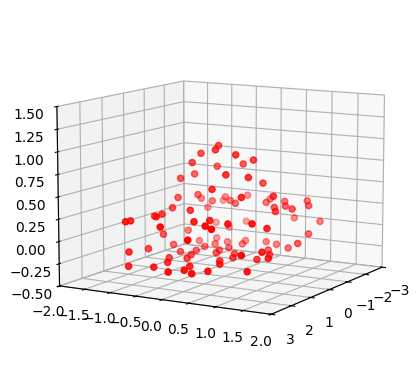

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha=0.5, edgecolor='gray', zorder=1)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', zorder=1)

ax.view_init(elev=10, azim=30)

plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

## 확률 밀도 함수 추정
### scipy 내 parzen method는 1차원 윈도우만 생성
https://sebastianraschka.com/Articles/2014_kernel_density_est.html

## 데이터 CSV로 저장

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame(points)

In [17]:
df

,0,1,2
0,2.438823,-0.927943,0.250000
1,0.384279,0.608083,0.692301
2,-1.731980,-1.000000,0.108366
3,-0.643370,-0.636913,-0.250000
4,0.821043,0.082809,0.558529
...,...,...,...
95,-1.224224,-0.973505,-0.250000
96,0.261762,-0.069936,0.959248
97,1.508005,-0.504743,-0.250000
98,0.227407,0.307728,0.919985


In [18]:
df.to_csv("../3D/data/points.csv", index=False)

## 데이터 호출

In [19]:
# dens = pd.read_csv("../3D/data/density.csv")
# dens